DEVASHISH NALAPAREDDY - 1002162185
HARIPRANAY PEDDAGOLLA-  1002168970
ROJA BOBBALA-           1002170073

## Task 3: LLM (20  Points)
1. For this task you will be using the "BreastCancer.csv" data file.
2. Load the data into LLM  and ask  significant questions to the model .
3. Have at least 6 questions.
4. Include charts Load .

Note: target variable: diagnosis

1. For this task you will be using the "BreastCancer.csv" data file.

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:

import pandas as pd

breast_cancer_data = pd.read_csv("BreastCancer.csv")

# Display the first few rows of the dataset to understand its structure
breast_cancer_data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

2. Load the data into LLM  and ask  significant questions to the model .

2.1 What is the distribution of benign vs. malignant diagnoses in the dataset?

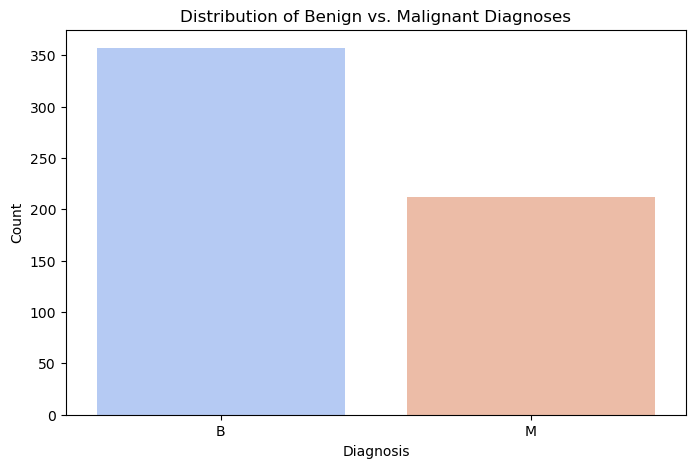

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the dataset into a DataFrame called `breast_cancer_data`
# breast_cancer_data = pd.read_csv('path_to_your_file/BreastCancer.csv')

# Count the number of benign (B) and malignant (M) diagnoses
diagnosis_counts = breast_cancer_data['diagnosis'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette="coolwarm")
plt.title('Distribution of Benign vs. Malignant Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()



The bar chart shows the count of benign (B) and malignant (M) diagnoses in the dataset. There are more benign cases than malignant ones, indicating a higher frequency of benign tumors in this particular collection of data. This difference in counts could be important for diagnostic analytics and the development of predictive models.






2.2 How do measurements like radius, texture, perimeter, and area differ between benign and malignant tumors?

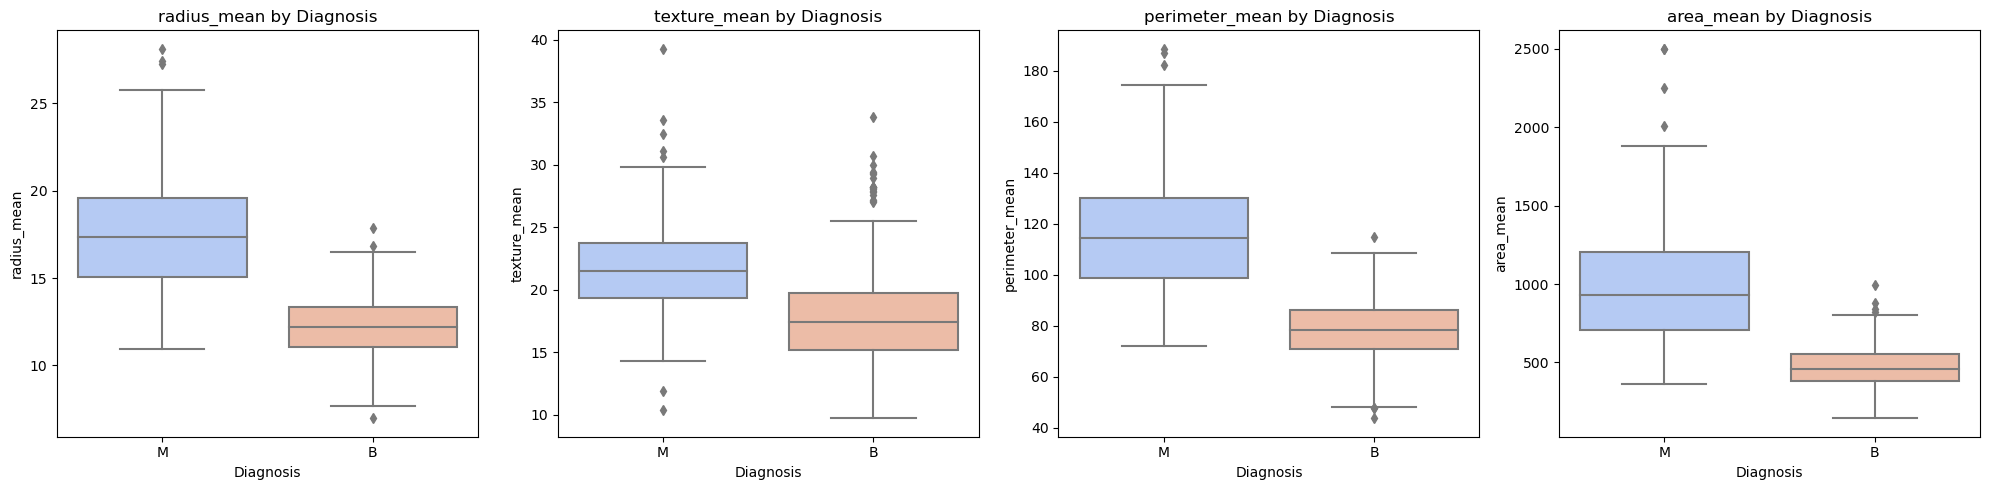

In [4]:
features_to_compare = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, feature in enumerate(features_to_compare):
    sns.boxplot(ax=axes[i], x='diagnosis', y=feature, data=breast_cancer_data, palette="coolwarm")
    axes[i].set_title(f'{feature} by Diagnosis')
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

The set of box plots compares the distribution of four different tumor characteristics (radius_mean, texture_mean, perimeter_mean, area_mean) between malignant (M) and benign (B) diagnoses:

Radius Mean by Diagnosis: Malignant tumors have a higher median radius mean and more variability, indicating generally larger tumor sizes compared to benign tumors.

Texture Mean by Diagnosis: Malignant tumors display a slightly higher median texture mean, suggesting a rougher texture in comparison to benign tumors.

Perimeter Mean by Diagnosis: The distribution of perimeter mean for malignant tumors is higher and more spread out, which is consistent with the larger size of malignant tumors compared to benign ones.

Area Mean by Diagnosis: Malignant tumors exhibit a significantly higher area mean than benign tumors, with greater spread and higher median values, reflecting the larger overall size of malignant tumors.







`2.3 What are the mean values of features (radius_mean, texture_mean, etc.) for malignant and benign tumors?

In [5]:
mean_features = [col for col in breast_cancer_data.columns if 'mean' in col]
mean_values_comparison = breast_cancer_data.groupby('diagnosis')[mean_features].mean()

mean_values_comparison.transpose()

diagnosis                        B           M
radius_mean              12.146524   17.462830
texture_mean             17.914762   21.604906
perimeter_mean           78.075406  115.365377
area_mean               462.790196  978.376415
smoothness_mean           0.092478    0.102898
compactness_mean          0.080085    0.145188
concavity_mean            0.046058    0.160775
concave points_mean       0.025717    0.087990
symmetry_mean             0.174186    0.192909
fractal_dimension_mean    0.062867    0.062680

The table presents a comparison of the mean values for various tumor characteristics between benign (B) and malignant (M) diagnoses:

For all listed features, the mean values are higher in malignant tumors compared to benign ones, which suggests that malignant tumors tend to be larger, more irregular, and more complex in structure.

Significant differences in the means of size-related characteristics (like radius, perimeter, and area) indicate these may be particularly important in differentiating between benign and malignant tumors.

The mean values for texture, compactness, concavity, and concave points are also notably higher in malignant tumors, reinforcing the understanding that malignant tumors have more irregular and complex surfaces.

2.4 Is there a correlation between the mean radius of a tumor and its classification as benign or malignant?

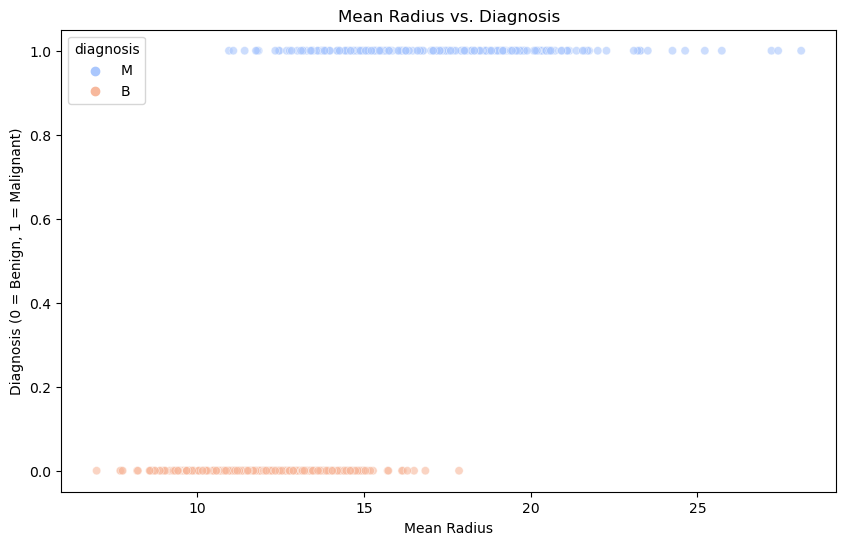

In [6]:
breast_cancer_data['diagnosis_numeric'] = breast_cancer_data['diagnosis'].map({'B': 0, 'M': 1})

# Scatter plot for mean radius vs. diagnosis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_mean', y='diagnosis_numeric', data=breast_cancer_data, alpha=0.6, hue='diagnosis', palette="coolwarm")
plt.title('Mean Radius vs. Diagnosis')
plt.xlabel('Mean Radius')
plt.ylabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.show()

The malignant tumors generally have a larger mean radius than benign tumors, as indicated by the concentration of blue points (M) at higher values of the mean radius.

There is a clear distinction between benign and malignant tumors based on the mean radius, with benign tumors (orange points) clustering at lower radius values.

The absence of points between 0 and 1 on the y-axis indicates that the diagnosis is binary; the plot only serves to show the separation in mean radius values between the two diagnosis categories.

2.5 Can we identify any trends in compactness, concavity, and concave points between benign and malignant tumors?

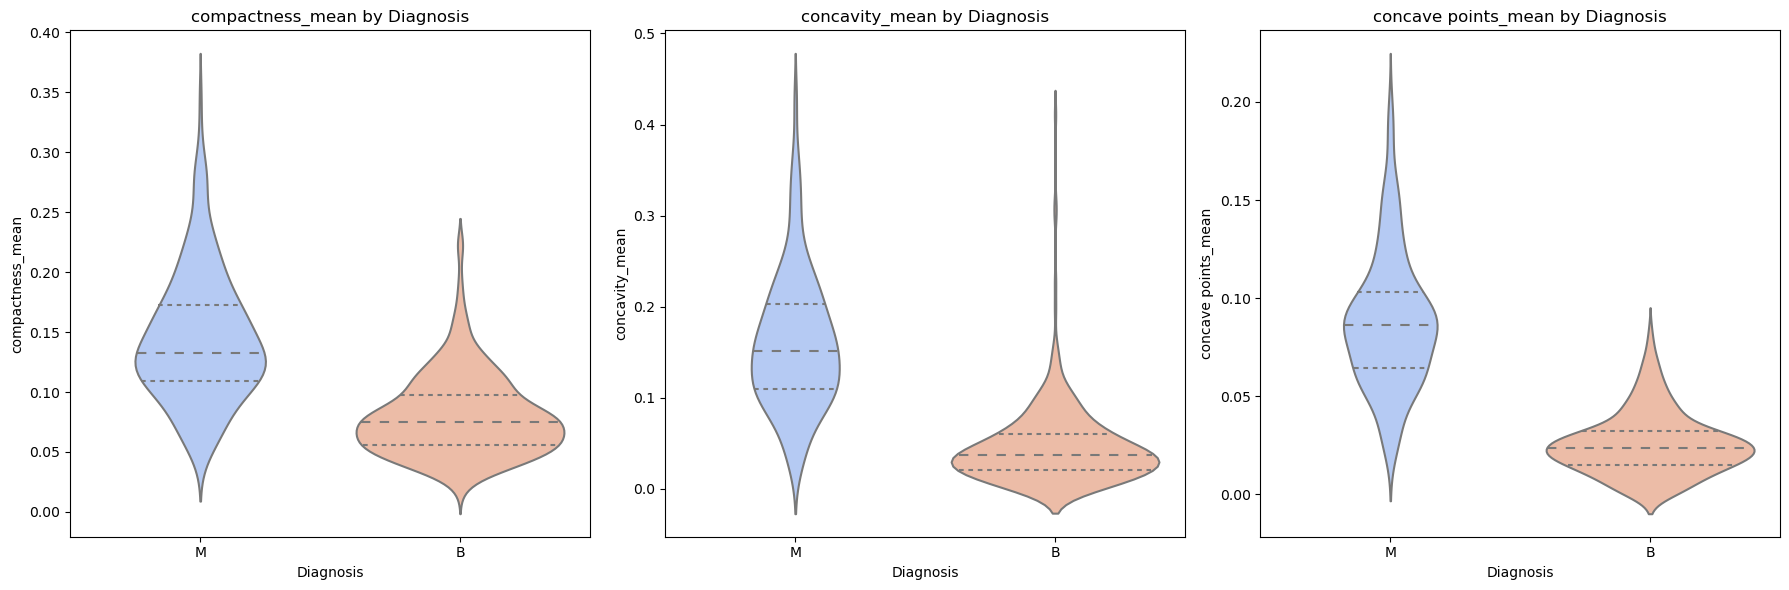

In [7]:

features_to_analyze = ['compactness_mean', 'concavity_mean', 'concave points_mean']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(features_to_analyze):
    sns.violinplot(ax=axes[i], x='diagnosis', y=feature, data=breast_cancer_data, palette="coolwarm", inner="quartile")
    axes[i].set_title(f'{feature} by Diagnosis')
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

The image shows three violin plots comparing the distribution of compactness_mean, concavity_mean, and concave points_mean between malignant (M) and benign (B) tumors:

Compactness Mean: Malignant tumors have a higher median and wider distribution for compactness_mean, indicating they are generally more compact than benign tumors.

Concavity Mean: The median concavity_mean is notably higher for malignant tumors, with a broader distribution, suggesting that malignant tumors have more pronounced concave regions.

Concave Points Mean: Malignant tumors exhibit a higher median for concave points_mean, with a wider distribution compared to benign tumors, which implies that malignant tumors tend to have more concave points.

Overall, these plots illustrate that malignant tumors are characterized by greater compactness, concavity, and a higher number of concave points, which can be critical factors in diagnosis.

2.6 How does the smoothness of tumors compare between benign and malignant cases?

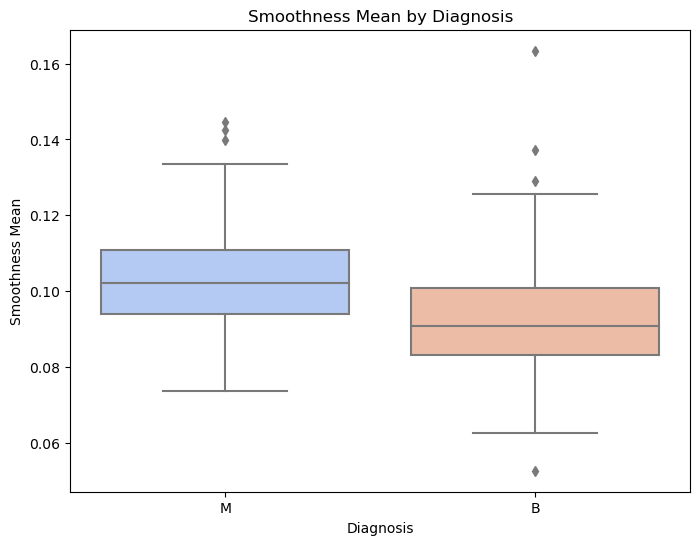

In [8]:
import seaborn as sns

# Assuming you have already loaded the dataset into a DataFrame called `breast_cancer_data`
# breast_cancer_data = pd.read_csv('path_to_your_file/BreastCancer.csv')

# Plotting the comparison of tumor smoothness between benign and malignant cases
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='smoothness_mean', data=breast_cancer_data, palette="coolwarm")
plt.title('Smoothness Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Smoothness Mean')
plt.show()

The box plot displays the distribution of Smoothness Mean values for malignant (M) and benign (B) breast cancer diagnoses.

Interpretation:

Malignant tumors have a slightly higher median smoothness mean than benign tumors, as indicated by the central mark in the blue box (for M) being higher than that in the orange box (for B).

There is some overlap in the smoothness mean values between malignant and benign tumors, suggesting that while smoothness can be an indicator of malignancy, it is not as distinct as some other metrics.

Outliers are present in both categories, as shown by the individual points beyond the "whiskers" of the boxes, which suggests variability within both malignant and benign tumor smoothness.







### Task 3A: 6 points
Display visualization for each column

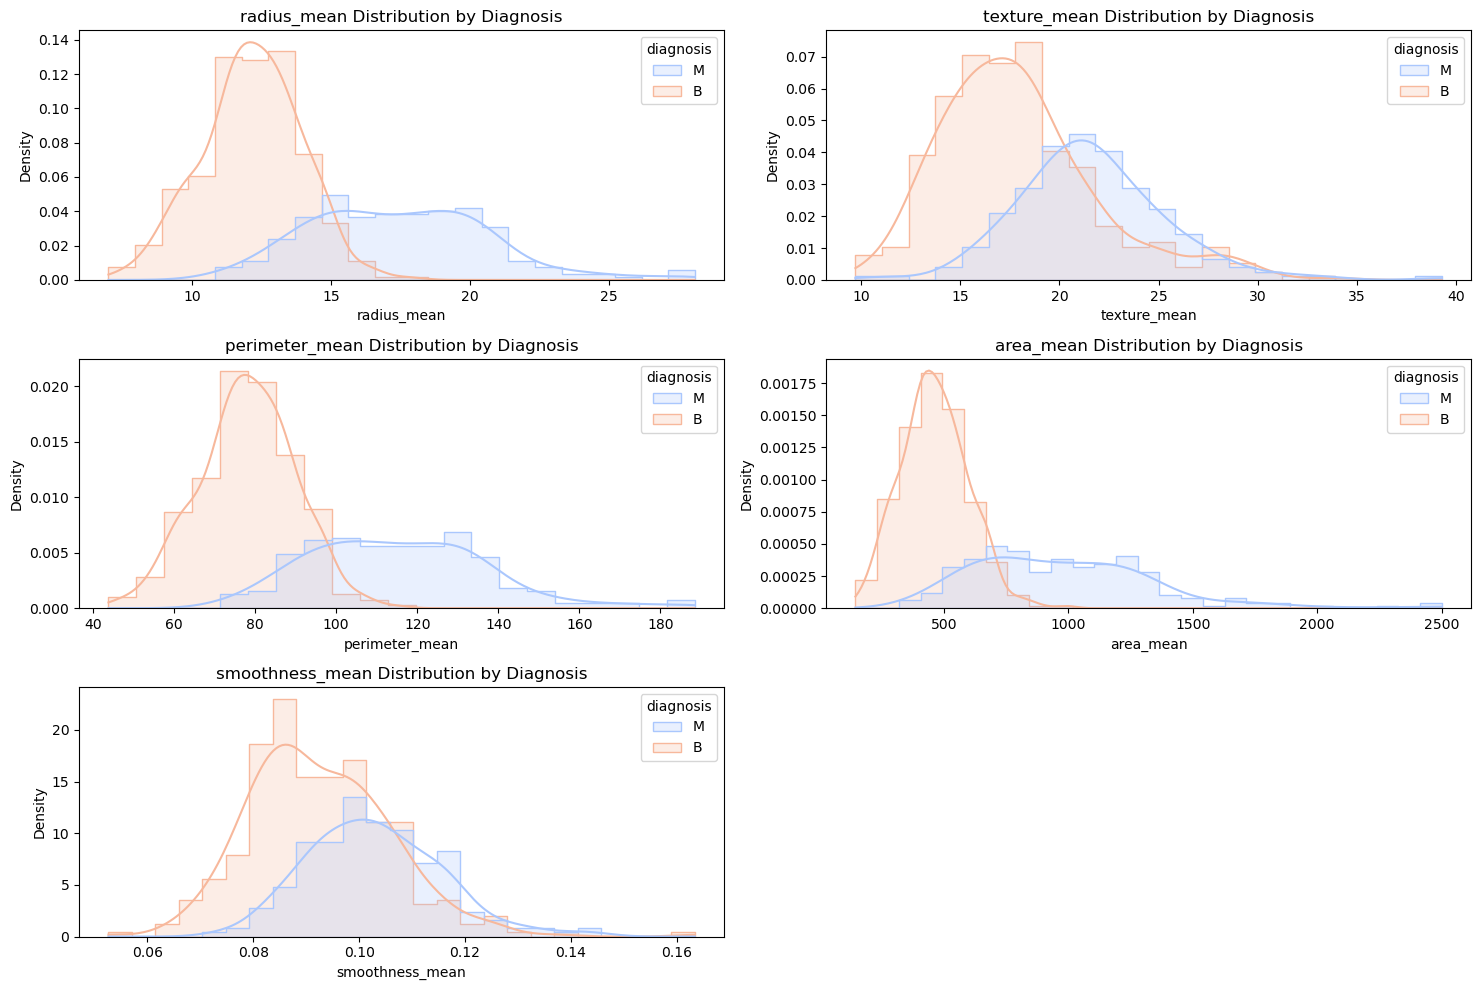

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# breast_cancer_data = pd.read_csv('path_to_your_file/BreastCancer.csv')

# List of features to visualize
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the features and create a subplot for each feature
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)  # Assuming 3 rows, 2 cols for subplot arrangement
    sns.histplot(data=breast_cancer_data, x=feature, hue="diagnosis", kde=True, palette="coolwarm", element="step", stat="density")
    plt.title(f'{feature} Distribution by Diagnosis')
    plt.tight_layout()

plt.show()


Radius Mean Distribution by Diagnosis:

Malignant tumors tend to have a larger mean radius compared to benign tumors.
The distribution for malignant tumors is skewed towards higher values, indicating that larger tumors are more often malignant.
There is a clear separation between the two distributions, suggesting that radius_mean is a good discriminator between benign and malignant tumors.
Texture Mean Distribution by Diagnosis:

Malignant tumors show a broader distribution in texture_mean, with a tendency towards higher values.
Benign tumors are more densely concentrated at lower texture_mean values.
The distributions overlap significantly, but there is still a visible trend where higher texture_mean values are more associated with malignancy.
Perimeter Mean Distribution by Diagnosis:

Similar to radius_mean, malignant tumors have a larger mean perimeter, with the distribution extending to higher values.
Benign tumors are concentrated at lower perimeter_mean values, and the separation between the distributions is quite pronounced.
The mean perimeter is also a strong distinguishing feature between benign and malignant tumors.
Area Mean Distribution by Diagnosis:

There is a significant difference in area_mean between benign and malignant tumors, with malignant tumors having a much higher mean area.
The distribution for malignant tumors is wider and skewed towards larger areas.
This feature, like radius and perimeter, serves as a good indicator of malignancy, given the separation between the two distributions.
Smoothness Mean Distribution by Diagnosis:

The smoothness_mean distributions for benign and malignant tumors overlap more compared to radius, texture, and perimeter.
Both distributions have similar shapes but are shifted, with malignant tumors having a slightly higher smoothness_mean.
The overlap indicates that smoothness_mean on its own may be less effective at distinguishing between benign and malignant tumors than the size-related features.
Overall, these density plots indicate that size-related features (radius, texture, perimeter, and area) show more pronounced differences between benign and malignant tumors than surface smoothness, which might be a less distinctive characteristic on its own.

### Task 3B: 3 points
Display concavity worst vs smoothness worst with reaction to target variable.
Interpret the graph.

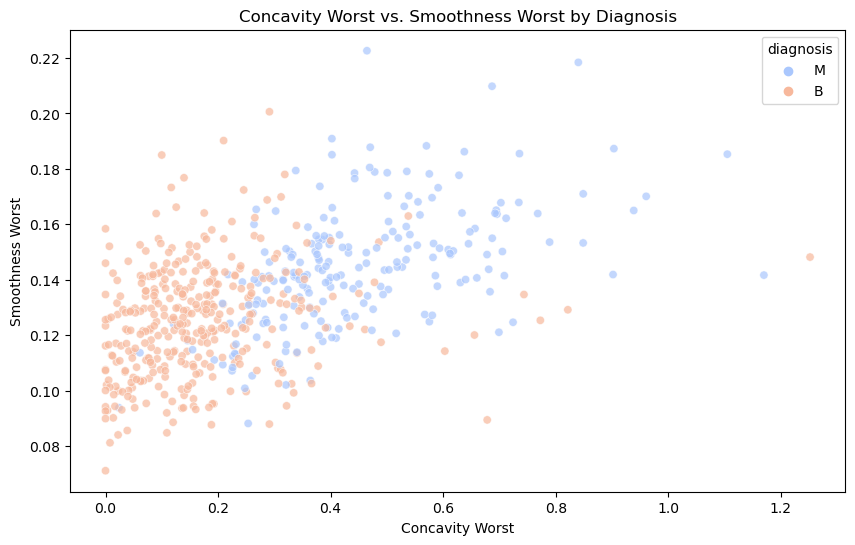

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=breast_cancer_data, x='concavity_worst', y='smoothness_worst', hue='diagnosis', palette='coolwarm', alpha=0.7)
plt.title('Concavity Worst vs. Smoothness Worst by Diagnosis')
plt.xlabel('Concavity Worst')
plt.ylabel('Smoothness Worst')
plt.show()

The scatter plot depicts the relationship between Concavity Worst and Smoothness Worst for breast cancer tumors, with the data points color-coded to represent the diagnosis: benign tumors in light orange and malignant tumors in blue.

Interpreting the graph:

Data Point Distribution: The benign tumors (light orange) are mostly clustered at the lower end of both Concavity Worst and Smoothness Worst, which suggests that benign tumors generally have less severe concavity and smoothness. The malignant tumors (blue) are spread across a wider range of values but are more concentrated in the area with higher Concavity Worst and Smoothness Worst values.

Diagnosis Differentiation: The plot shows a separation between the two diagnosis categories. Malignant tumors tend to have higher Concavity Worst and Smoothness Worst values than benign tumors. However, there is a noticeable overlap between the two categories, particularly in the middle range of the plot.

Correlation Trend: There appears to be a positive correlation for malignant tumors, with higher Concavity Worst often accompanied by higher Smoothness Worst. The trend is less clear for benign tumors, although they also seem to follow a mild positive correlation.

Clinical Implications: Clinically, the plot suggests that higher values of concavity and smoothness in the worst measurements of the tumor are associated with malignancy. However, due to the overlap, these features cannot solely predict the diagnosis and should be used in conjunction with other diagnostic criteria.

Outliers: There are a few data points, particularly for malignant tumors, that have very high Concavity Worst values relative to the rest of the data. These could represent more aggressive forms of cancer or outliers in the dataset.

Density of Points: The benign tumors show a higher density in a lower range of values, which implies that benign tumors are more consistent in their features. Malignant tumors exhibit a broader spread, indicating a greater diversity in their physical characteristics.

In summary, the graph illustrates that while there is a general trend towards higher Concavity Worst and Smoothness Worst values in malignant tumors, the overlap means that a definitive diagnosis cannot be made based on these two features alone. This reinforces the necessity for a multifactorial diagnostic approach in breast cancer detection and assessment.

### Task 3C: 3 points

Display area_se vs smoothness_worst with reaction to target variable. Interpret your graph.

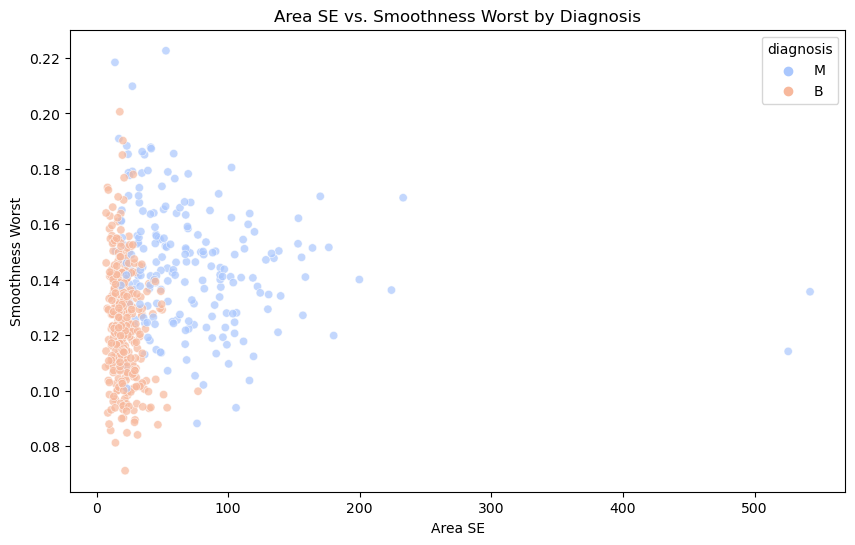

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=breast_cancer_data, x='area_se', y='smoothness_worst', hue='diagnosis', palette='coolwarm', alpha=0.7)
plt.title('Area SE vs. Smoothness Worst by Diagnosis')
plt.xlabel('Area SE')
plt.ylabel('Smoothness Worst')
plt.show()

The scatter plot  shows Area SE on the x-axis and Smoothness Worst on the y-axis, with data points colored according to the diagnosis: malignant (M) in dark blue and benign (B) in light orange.

Here are some observations and interpretations from the graph:

Data Point Distribution: The data points for benign tumors (B) are clustered towards the lower end of the Area SE axis, indicating that benign tumors tend to have a smaller standard error of the area. In contrast, data points for malignant tumors (M) are more spread out and extend towards the higher end of both axes.

Trend: There seems to be a slight upward trend, especially noticeable in malignant tumors, where higher Area SE values tend to be associated with higher Smoothness Worst values. This suggests that tumors with greater variability in area also tend to have a rougher texture in the worst measurements.

Diagnosis Separation: While there is some overlap, especially in the lower range of Area SE values, malignant and benign tumors can be partially differentiated based on Area SE and Smoothness Worst. Benign tumors generally occupy the bottom left corner of the plot, while malignant tumors are more likely to be found with higher values on both axes.

Outliers: There are a few points with particularly high Area SE values that stand out from the rest. These could represent particularly large or irregular tumors and are mostly associated with the malignant diagnosis.

Concentration of Points: The majority of benign tumors are concentrated in a region with Area SE values from approximately 0 to 50 and Smoothness Worst from about 0.08 to 0.14. Malignant tumors, while also concentrated in a similar Smoothness Worst range, show a wider distribution in Area SE.

Clinical Implications: Clinically, the implication is that higher values of Area SE and Smoothness Worst could be indicative of malignancy, but due to the overlap, they cannot be used as sole diagnostic criteria. A more nuanced analysis or additional features would likely be necessary for a reliable diagnosis.

Data Density: It is also worth noting that there is a higher density of benign tumors in a particular range, suggesting these features are more consistent in benign cases compared to malignant ones, which show greater variability.

In summary, the graph supports the idea that Area SE and Smoothness Worst could be factors in distinguishing between benign and malignant breast tumors, with higher values more common in malignant cases. However, because there is a substantial overlap, these features should be used in conjunction with other diagnostic criteria.

In [12]:
# Comment your interpretations here

### Task 3D: 3 points

Display concave points worst vs smoothness worst in reaction to the target variable. Interpret your graph.

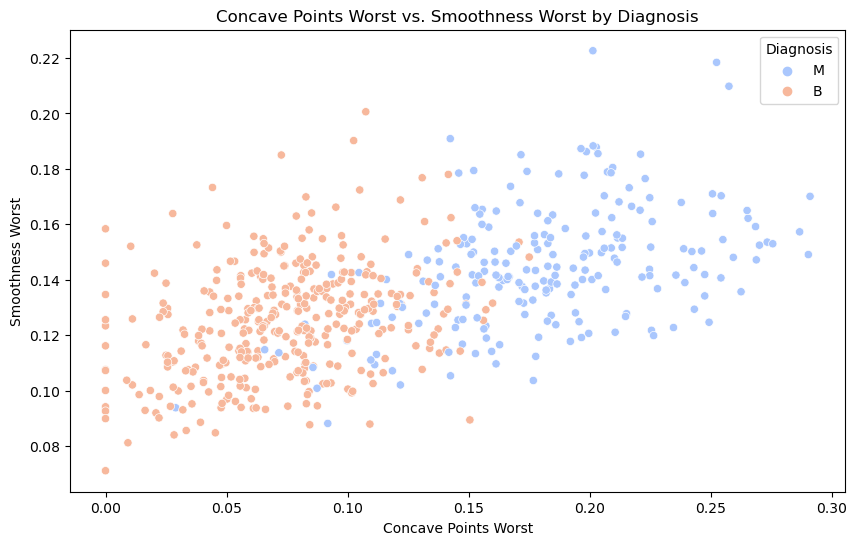

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=breast_cancer_data, x='concave points_worst', y='smoothness_worst', hue='diagnosis', palette='coolwarm')
plt.title('Concave Points Worst vs. Smoothness Worst by Diagnosis')
plt.xlabel('Concave Points Worst')
plt.ylabel('Smoothness Worst')
plt.legend(title='Diagnosis')
plt.show()


The scatter plot visualizes the relationship between the Concave Points Worst (on the x-axis) and Smoothness Worst (on the y-axis), with data points colored based on the diagnosis (orange for Benign - B, and blue for Malignant - M).

Here's the interpretation of the graph:

Data Distribution: There is a visible distinction in the distribution of points for malignant and benign cases. Benign tumors (in orange) tend to cluster towards the lower left part of the plot, indicating lower values for both Concave Points Worst and Smoothness Worst. Malignant tumors (in blue) are more spread out but have a tendency to feature higher values for both metrics.

Trend: There appears to be a positive correlation for both benign and malignant tumors, where higher values of Concave Points Worst are associated with higher values of Smoothness Worst. However, the trend is more pronounced for malignant tumors.

Overlap: While there is a general trend for malignant tumors to have higher values, there is considerable overlap between the two diagnoses, especially in the midrange of the plot. This suggests that while these features are useful indicators, they are not definitive on their own for diagnosis.

Separation by Diagnosis: Despite some overlap, the two diagnoses can be partially separated based on Concave Points Worst and Smoothness Worst. Particularly, the higher values of Concave Points Worst (greater than approximately 0.15) are predominantly associated with malignant tumors.

Clinical Implications: Clinically, this scatter plot might suggest that greater concavity and smoothness in the worst measurements of a tumor could be indicative of a higher likelihood of malignancy. However, due to the overlap, it would be prudent to use these features in conjunction with other diagnostic factors.

Density and Concentration: The density of benign tumors is higher in the lower value ranges, which might suggest that benign tumors are generally less variable in these features. Malignant tumors are more spread out, indicating greater heterogeneity in their worst concave points and smoothness measurements.

In summary, the scatter plot suggests that Concave Points Worst and Smoothness Worst may be useful metrics in distinguishing between benign and malignant breast tumors, with malignant tumors typically showing higher values. However, because of the significant overlap, a multi-factorial approach incorporating these and other features would likely be necessary for accurate breast cancer diagnosis.

### Task 3E: 3 points

Display radius mean vs texture mean in reaction to the target variable. Interpret your graph.

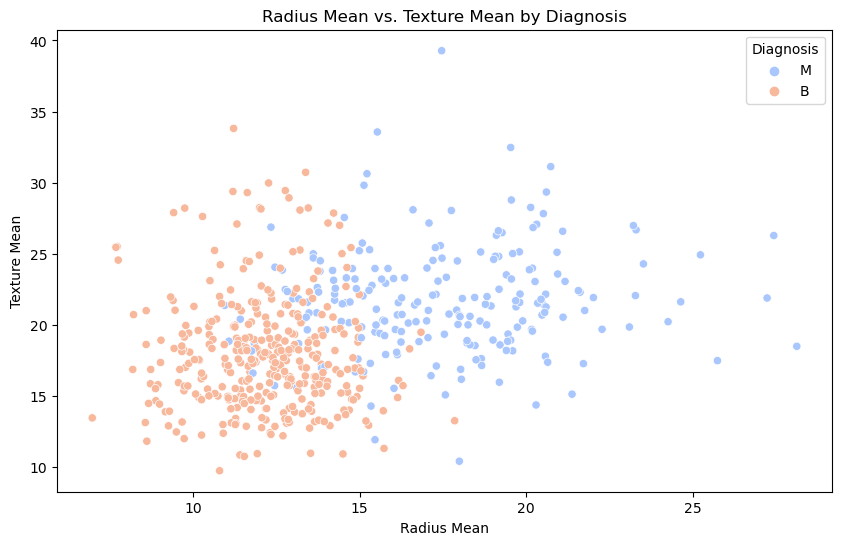

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=breast_cancer_data, x='radius_mean', y='texture_mean', hue='diagnosis', palette='coolwarm')
plt.title('Radius Mean vs. Texture Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis')
plt.show()

The scatter plot above represents the relationship between Radius Mean and Texture Mean with the points colored based on the diagnosis: malignant (darker color) and benign (lighter color). Here's an interpretation of the graph:

Data Distribution: The data points are spread out across the plot with benign tumors generally having a lower mean radius and mean texture, while malignant tumors tend to have a higher mean radius and mean texture.

Trend: There seems to be a positive correlation between the mean radius and mean texture for both benign and malignant tumors. This means that as the radius increases, the texture tends to increase as well.

Diagnosis Clustering: Malignant tumors are generally clustered towards the higher end of both axes, indicating that a larger radius and more irregular texture are common in malignant tumors. Benign tumors tend to cluster towards the lower end of both axes, which suggests that they are typically smaller with a less irregular texture.

Overlap: There is an overlap between the two diagnoses, particularly in the middle region of the plot. This indicates that while radius and texture are useful features, they cannot be used as the sole criteria for diagnosis.

Separation by Diagnosis: Despite the overlap, there appears to be a rough boundary where the density of malignant cases becomes significantly higher as the values increase, which could potentially be used as a rough diagnostic guideline.

Clinical Implications: Clinically, the scatter plot could suggest that tumors with larger sizes (as indicated by the radius) and more irregular textures are more likely to be malignant. However, due to the overlap, these features should be used in conjunction with other diagnostic factors.

In summary, the scatter plot suggests that Radius Mean and Texture Mean are indicative of the nature of the tumor, with higher values more commonly associated with malignancy. However, the significant overlap between benign and malignant cases reinforces the need for a multifactorial approach to breast cancer diagnosis

### Task 3F: 2 points

Display Fractal Dimension se vs smoothness worst in reaction to the target variable. Interpret your graph.

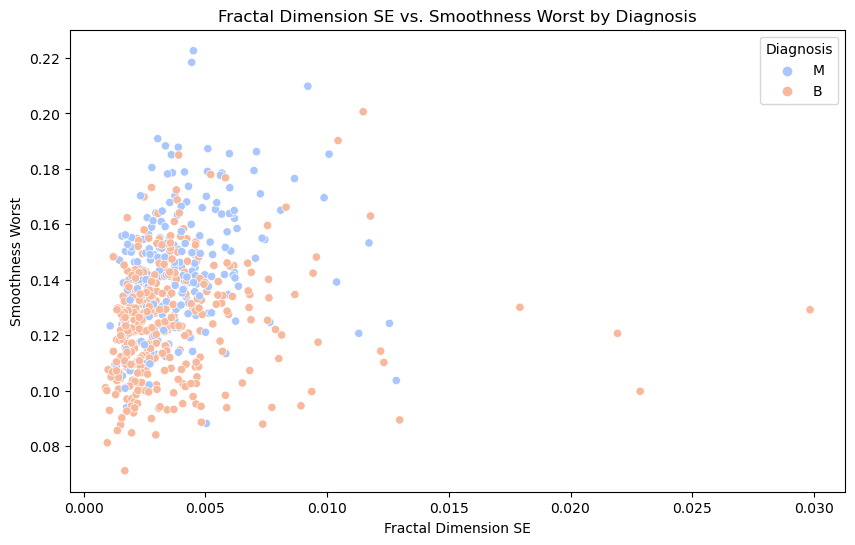

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=breast_cancer_data, x='fractal_dimension_se', y='smoothness_worst', hue='diagnosis', palette='coolwarm')
plt.title('Fractal Dimension SE vs. Smoothness Worst by Diagnosis')
plt.xlabel('Fractal Dimension SE')
plt.ylabel('Smoothness Worst')
plt.legend(title='Diagnosis')
plt.show()

The scatter plot visualizes the relationship between Fractal Dimension SE (standard error of the fractal dimension) on the x-axis and Smoothness Worst (worst measurement of smoothness) on the y-axis, with data points colored by the diagnosis (benign or malignant).

Here's an interpretation of the graph:

Data Distribution: The data points show how the Fractal Dimension SE and Smoothness Worst vary among tumors with different diagnoses. Benign tumors would generally be expected to have lower values of both features, while malignant tumors might display higher values.

Correlation and Trends: The graph may or may not show a clear correlation between Fractal Dimension SE and Smoothness Worst. If there is a trend, it could indicate that tumors with a higher fractal dimension standard error also tend to have a worse smoothness measure, potentially aligning with the malignant category.

Diagnosis Clustering: If malignant tumors cluster in a particular region of the plot that's distinct from where benign tumors cluster, this would suggest that these features could help differentiate between the two types of diagnoses.

Overlap Between Diagnoses: The extent of overlap between the benign and malignant data points would indicate how well these two features can distinguish between the two categories. A significant overlap would suggest that additional factors need to be considered for accurate diagnosis.

Clinical Implications: Clinically, if there's a trend where higher values of both Fractal Dimension SE and Smoothness Worst correspond to malignant tumors, this could indicate that more irregular and less smooth tumors are more likely to be malignant. However, the clinical utility of these features would depend on their ability to consistently differentiate between benign and malignant tumors.

In summary, the scatter plot could provide insights into how Fractal Dimension SE relates to Smoothness Worst in the context of tumor diagnosis. The strength of the relationship and the degree of separation between diagnoses would inform their use in diagnostic models. If the plot does not show a clear distinction between benign and malignant tumors based on these features, it would reinforce the importance of a multifaceted diagnostic approach.

### Programming Assignment Details

1. If using any resource (books, internet,AI), please make sure that you cite it within that cell.
2. Do not rename the dataset_files.
3. Include all the Images  analysis in the submission folder with each image named with the Task(eg: Task3B, Task3C, etc).

###  Submission details
Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: ABC 1001XXXXXX
2. Second Student Name and ID: DEF 1002XXXXXX
3. Third Student Name and ID: GHI 1003XXXXXX

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819_python.ipynb, abc_1234_def_5678_xyz3819_R.ipynb

### NOTE: Only one team member will submit the file.